# Eigensystem calculations, optimization, and linear dynamical systems
## The Power Method
Author: Michelle Contreras Cossio

### Implementation of the Power Method
1. Implement the power method in Python. I've included my starter code below.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
    
    """
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
    
        self.components_ = None
        self.singular_values_ = None 
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        self.store_intermediate_results = store_intermediate_results
        self.stored_eigenvalues = []
        self.stored_eigenvectors = []

        np.random.seed(self.random_state)

    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """
        
        # 1. We start with a matrix A (NxN)
        N = A.shape[0]

        # 2. Pick a random vector v (Nx1) and convert it to a unit vector by scaling it with its own norm 
        v = np.random.rand(N)
        norm_v = np.linalg.norm(v)
        v = v/norm_v

        if self.store_intermediate_results:
            self.stored_eigenvalues.append(norm_v)
            self.stored_eigenvectors.append(v)

        v_p = np.copy(v)

        for i in range(self.max_iter):

            # 3. Compute the matrix product of our matrix with the random unit vector, and then update the vector
            v = A@v
            norm_v = np.linalg.norm(v)

            # 4. Re-normalize the resulting vector, producing a new unit vector
            v = v/norm_v

            # Momentum
            v += - self.gamma * v + self.gamma * v_p

            if self.store_intermediate_results:
                self.stored_eigenvalues.append(norm_v)
                self.stored_eigenvectors.append(v)
            
            # 5. Repeat steps 2 and 3 until the elements of the output unit vector fluctuate less than a pre-specified tolerance
            if np.all(np.abs(np.subtract(v,v_p)) < 1e-5): break
            v_p = np.copy(v)
        
        # 6. Multiply the resulting vector by the original matrix. The length (norm?) of the resulting vector gives the magnitude of the leading eigenvalue
        self.components_ = A@v
        self.singular_values_ = np.linalg.norm(self.components_)

        if self.store_intermediate_results:
            self.stored_eigenvalues.append(self.singular_values_)
            self.stored_eigenvectors.append(self.components_)

58.553459476398245
Power method solution: 4.151094674037192
Numpy solution: -4.151094674037191


Text(0, 0.5, 'Power method eigenvector')

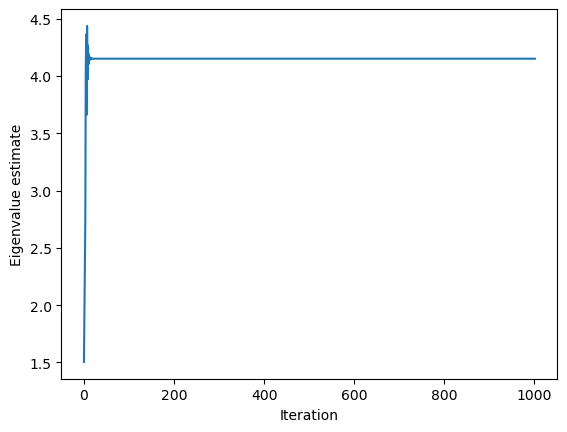

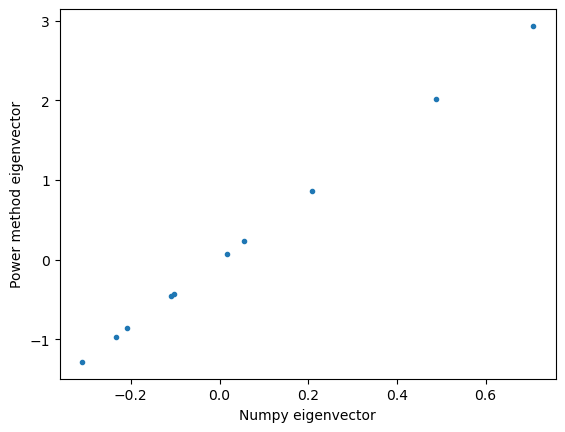

In [86]:
## import William's solutions
#from solutions.eigen import SpectralDecompositionPowerMethod

## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

2. Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? How does the direction of the starting vector affect the time it takes to reach a solution? 

If the matrix has small eigenvalues, close to zero (singular matrix), then the method takes longer to converge. Also, when this number is complex


3. Suppose that we interpret a given linear matrix $X$ as describing a discrete-time linear dynamical system, $\v{y}_{t+1} = X \v{y}_t$. What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?

Multiplying with a matrix could mean a rotation, expansion, or contraction. 

4. The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form $$\v{y}_t \leftarrow \gamma \v{y}_{t - 1} + (1 - \gamma) \dfrac{X \v{y}_{t - 1}} {|X \v{y}_{t - 1}|} $$ Where $\gamma \in (0, 1]$. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?

Lines added to code. And is boosting the method in those cases that the starting vector is not letting the method converge faster.

36.62479847568768
Power method solution: 3.182031511633237
Numpy solution: 3.1820249847236477


Text(0, 0.5, 'Power method eigenvector')

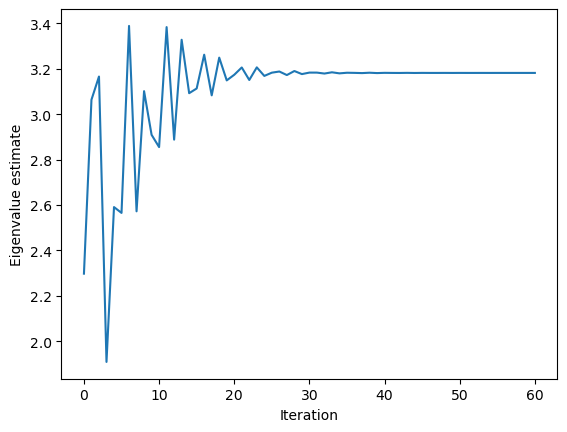

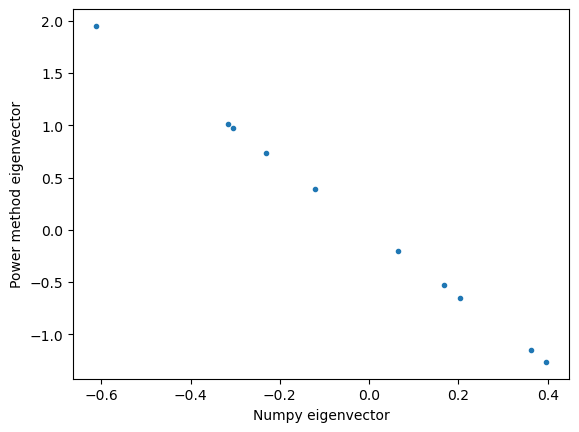

In [96]:
## import William's solutions
#from solutions.eigen import SpectralDecompositionPowerMethod

## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True, gamma=0.7)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

5. Similar to the momentum term, there is also a way to add additional damping to the update rule. What kinds of dynamics would that help us avoid?

Stop the cases where the eigenvalue fluctuates between a range of values, like a damped oscillator.